<a href="https://colab.research.google.com/github/318245915/Reconocimiento-de-Patrones-y-Aprendizaje-Automatizado/blob/main/Examen_3_Agrupamiento_(Clustering)_y_aprendizaje_no_supervisado_Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de datos: CIFAR-100

1. Selección de base de datos.

CIFAR-100 es un conjunto de datos extenso y bien documentado con 100 clases, cada una con 600 imágenes de 32x32 píxeles en color, resultando en una dimensión de datos de 3072 (32x32x3). Esta alta dimensionalidad es ideal para practicar técnicas de reducción de dimensionalidad y clustering.

2. Aplicación de PCA para reducir la dimensión de los datos.

**Paso 1:** Normalización de los datos.

In [ ]:
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cargar el conjunto de datos CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Aplanar las imágenes de 32x32x3 a vectores de 3072 dimensiones
x_train_flat = x_train.reshape(-1, 32*32*3)
x_test_flat = x_test.reshape(-1, 32*32*3)

# Normalizar los datos
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train_flat)
x_test_normalized = scaler.transform(x_test_flat)

169001437/169001437 [==============================] - 11s 0us/step


**Paso 2:** Aplicación de PCA.

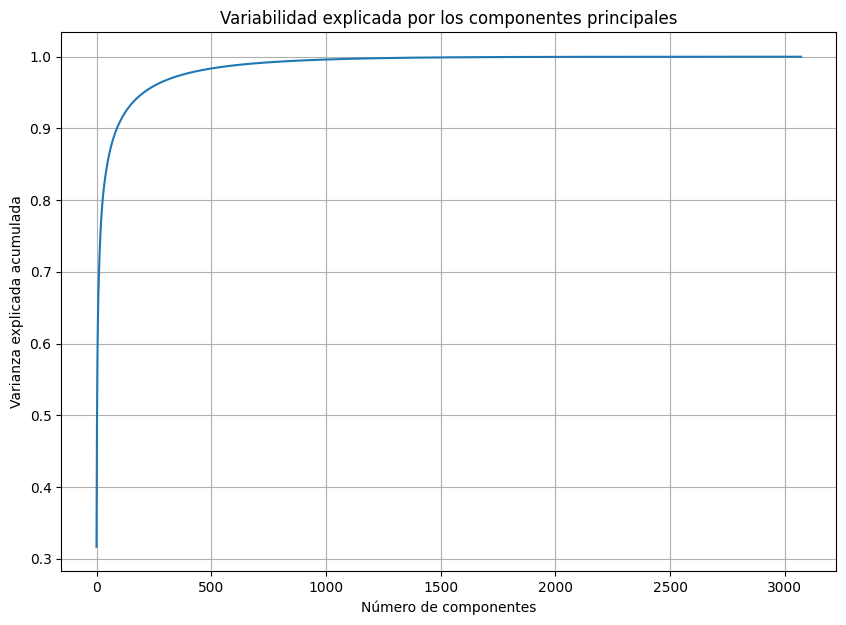

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA
pca = PCA()
pca.fit(x_train_normalized)

# Gráfica de la variabilidad explicada
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Variabilidad explicada por los componentes principales')
plt.grid(True)
plt.show()

# Selección del número de componentes que explican el 95% de la variabilidad
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Aplicación de PCA con el número de componentes seleccionados
pca = PCA(n_components=n_components)
x_train_reduced = pca.fit_transform(x_train_normalized)
x_test_reduced = pca.transform(x_test_normalized)

**Justificación de la cantidad de dimensiones**

Se seleccionaron los componentes principales que explican al menos el 95% de la variabilidad total, garantizando así que se retenga la mayor parte de la información original.

3. Utilización de una técnica de clustering.

**Técnica seleccionada:** K-Means

**Justificación**

K-Means es adecuado para datos de alta dimensionalidad reducidos y es fácil de implementar y ajustar. Se espera encontrar grupos esféricos de datos.

In [4]:
from sklearn.cluster import KMeans

# Inicialización y ajuste del modelo K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_train_reduced)

# Etiquetas de los clusters
labels_cluster = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4. Experimentación con diferentes números de clusters y evaluación.

**Métrica:** Silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

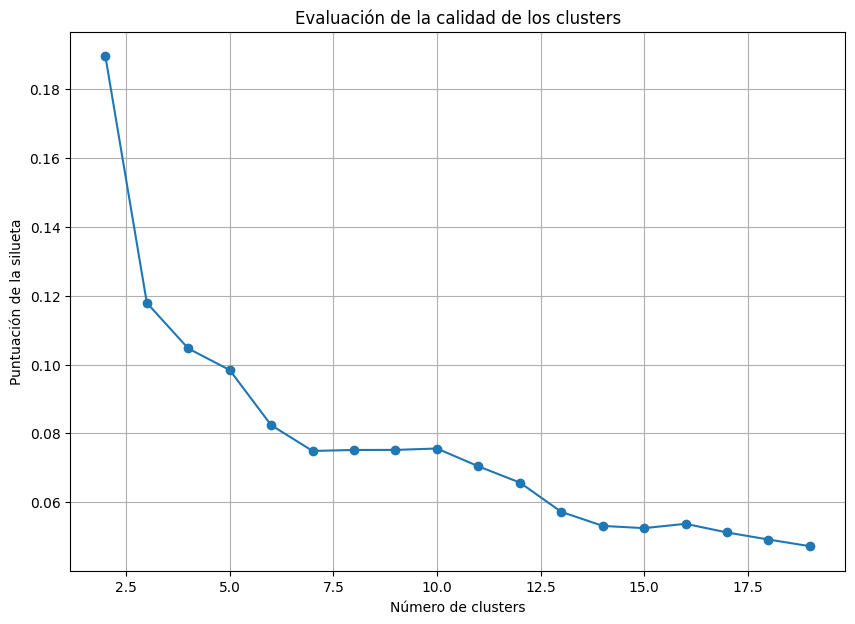

In [5]:
from sklearn.metrics import silhouette_score

# Evaluación con diferentes números de clusters
silhouette_scores = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_reduced)
    score = silhouette_score(x_train_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfica de la métrica de la silueta
plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de la silueta')
plt.title('Evaluación de la calidad de los clusters')
plt.grid(True)
plt.show()

5. Interpretación de los grupos de datos formados.

Visualización con t-SNE

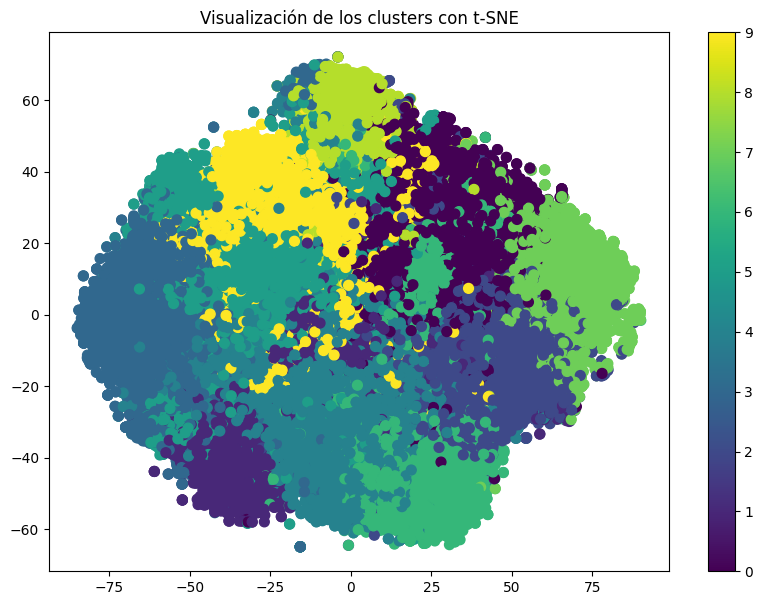

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(x_train_reduced)

plt.figure(figsize=(10, 7))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_cluster, cmap='viridis', s=50)
plt.colorbar()
plt.title('Visualización de los clusters con t-SNE')
plt.show()

6. Comparación de los clusters generados con las etiquetas reales.

Índice de Rand ajustado

In [7]:
from sklearn.metrics import adjusted_rand_score

# Cálculo del índice de Rand ajustado
rand_index = adjusted_rand_score(y_train.flatten(), labels_cluster)
print(f"Índice de Rand ajustado: {rand_index:.4f}")

Índice de Rand ajustado: 0.0143


7. Identificación de los clusters con peor rendimiento y discusión.

Distribución de las etiquetas reales dentro de cada cluster

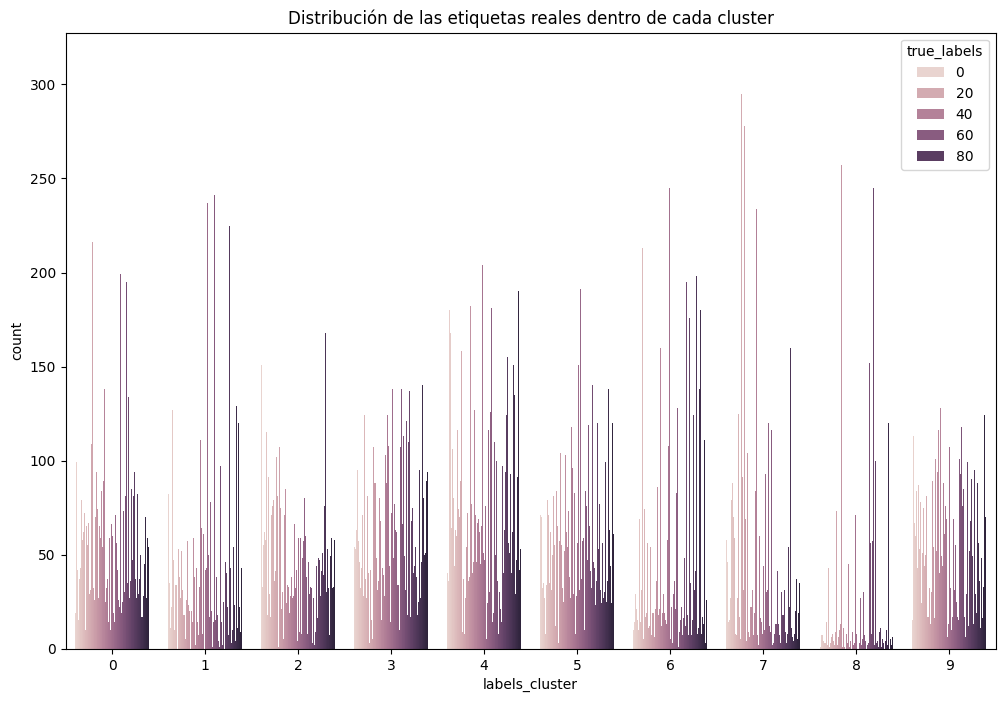

In [8]:
import seaborn as sns
import pandas as pd

# Creación de un DataFrame para facilitar el análisis
df = pd.DataFrame({'labels_cluster': labels_cluster, 'true_labels': y_train.flatten()})

# Visualización de la distribución de las etiquetas reales dentro de cada cluster
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='labels_cluster', hue='true_labels')
plt.title('Distribución de las etiquetas reales dentro de cada cluster')
plt.show()

**Análisis:**

*   **Datos solapados:** Puede que algunas clases tengan características muy similares, dificultando la separación clara.
*   **Número insuficiente de clusters:** Podría ser que el número de clusters no sea adecuado para capturar la estructura de los datos.
*   **Reducción de dimensionalidad:** La pérdida de información durante la reducción puede haber afectado la capacidad del algoritmo para identificar patrones significativos.



***Conclusión***

Esta metodología abarca una práctica completa y coherente de reducción de dimensionalidad y clustering, permitiendo una interpretación detallada y justificada de los resultados.